In [1]:
from flash_ansr import FlashANSR, SoftmaxSamplingConfig, BeamSearchConfig, MCTSGenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
MODEL = "psaegert/flash-ansr-v23.0-120M"

In [4]:
install_model(MODEL)

Installing model psaegert/flash-ansr-v23.0-120M to /home/psaegert/Projects/flash-ansr/models/psaegert/flash-ansr-v23.0-120M


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Model psaegert/flash-ansr-v23.0-120M installed successfully!


# Example 1

In [5]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    generation_config=SoftmaxSamplingConfig(choices=1024 * 32),
    parsimony=0.05,
    prune_constant_budget=0
).to(device)

In [6]:
X = np.random.uniform(0, 10, size=(150, 1))
y = np.cos(X * 1.9) * (np.exp(-X * 0.4)) + np.random.normal(0, 0.01, size=X.shape)

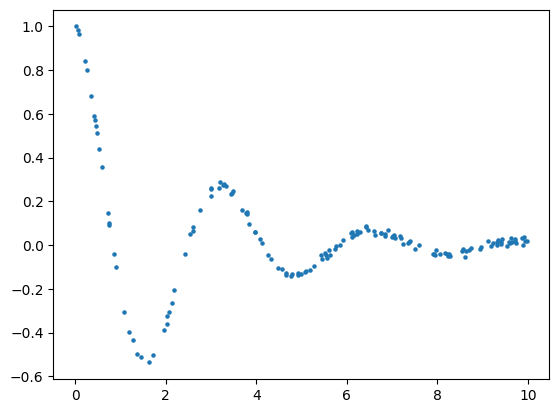

In [7]:
plt.scatter(X, y, s=5)

In [8]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 29811/29811 [00:38<00:00, 780.29it/s] 


In [9]:
# # Optional: Re-compile with different parsimony
nsr.compile_results(parsimony=0.1)

In [10]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [11]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results[:2048])]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results[:2048])]

/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:173: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:130: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:498: RuntimeWarning: invalid value encountered in arctanh
  return np.arctanh(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:306: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:522: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operato

In [14]:
for i in range(100):
    if "exp" in nsr.get_expression(i):
        continue
    print(i, nsr.get_expression(i))

37 cos(-1.9 * x1) / (cosh(0.48 * x1) - x1 / -2.71)
38 cos(-1.9 * x1) / (0.37 * x1 + cosh(0.48 * x1))
39 cos(-1.9 * x1) / cosh(pow1_3(-0.78 * pow2(x1)))
40 cos(1.9 * x1) / cosh(pow3(pow1_5(x1)))
41 cos(1.9 * x1) / cosh(pow1_5(pow3(x1)))
49 cos(-1.9 * x1) / pow1_2(cosh(x1) + sin(x1))
88 cos(-1.9 * x1) / cosh(pow1_5(-pow3(x1)))
90 cos(1.9 * x1) / pow1_5(x1 + cosh(2.22 * x1))
91 cos(-1.9 * x1) / cosh(-0.22 * (x1 + 3.17 * pow1_2(x1)))


In [19]:
for i in range(1000):
    if not 'exp' in nsr.get_expression(i) and not "cosh" in nsr.get_expression(i) and not "sin" in nsr.get_expression(i):
        print(i, nsr.get_expression(i))

125 cos(-1.9 * x1) * cos(1.6 / (1/x1 - -0.92))
136 cos(1.9 * x1) / (cos(x1) + pow1_3(pow4(x1)))
137 cos(-1.9 * x1) / (cos(x1) + pow4(pow1_3(x1)))
144 cos(1.9 * x1) * cos(atan(x1 / 1.3) - -6.4)
179 cos(-1.9 * x1) / (x1 + cos(pow1_2(x1)) + pow4(0.27 * x1))
204 cos(1.9 * x1) / (0.28 * (pow2(x1) - -3.88))
205 cos(-1.9 * x1) * (tanh(x1) / x1 - 0.07)
209 cos(1.9 * x1) * cos(atan(x1) / -0.96)
210 cos(1.9 * x1) * cos(1.05 * atan(x1))
214 cos(-1.9 * x1) * (-0.1 + tanh(1.19 / x1))
215 cos(-1.9 * x1) * atan(acos(tanh(x1 * pow1_5(0.27 / x1))))
219 cos(1.9 * x1) * cos(-1.56 * tanh(pow1_3(pow2(x1) / 6.04)))
277 cos(-1.9 * x1) * (1.94 - atan(-0.28 * x1) * (-1.23 + -3.43 / x1))
279 cos(1.9 * x1) * cos(atan(x1 + pow4(-0.25 * x1)))
281 cos(-1.9 * x1) * cos(atan(x1 + pow5(0.23 * x1)))
289 cos(1.9 * x1) / (cos(x1) + x1 * pow1_3(abs(x1)))
290 cos(1.9 * x1) / (cos(x1) + x1 * abs(pow1_3(x1)))
298 cos(-1.9 * x1) * tanh(pow1_2(1/x1) - 0.3)
309 cos(-1.9 * x1) * (atan(x1) / x1 - 0.13)
312 cos(-1.9 * x1) * cos(at

cos(-1.9 * x1) * exp(-0.4 * x1)
cos(-1.9 * x1) / (cosh(0.48 * x1) - x1 / -2.71)
cos(1.9 * x1) / (0.28 * (x1**2 - -3.88))


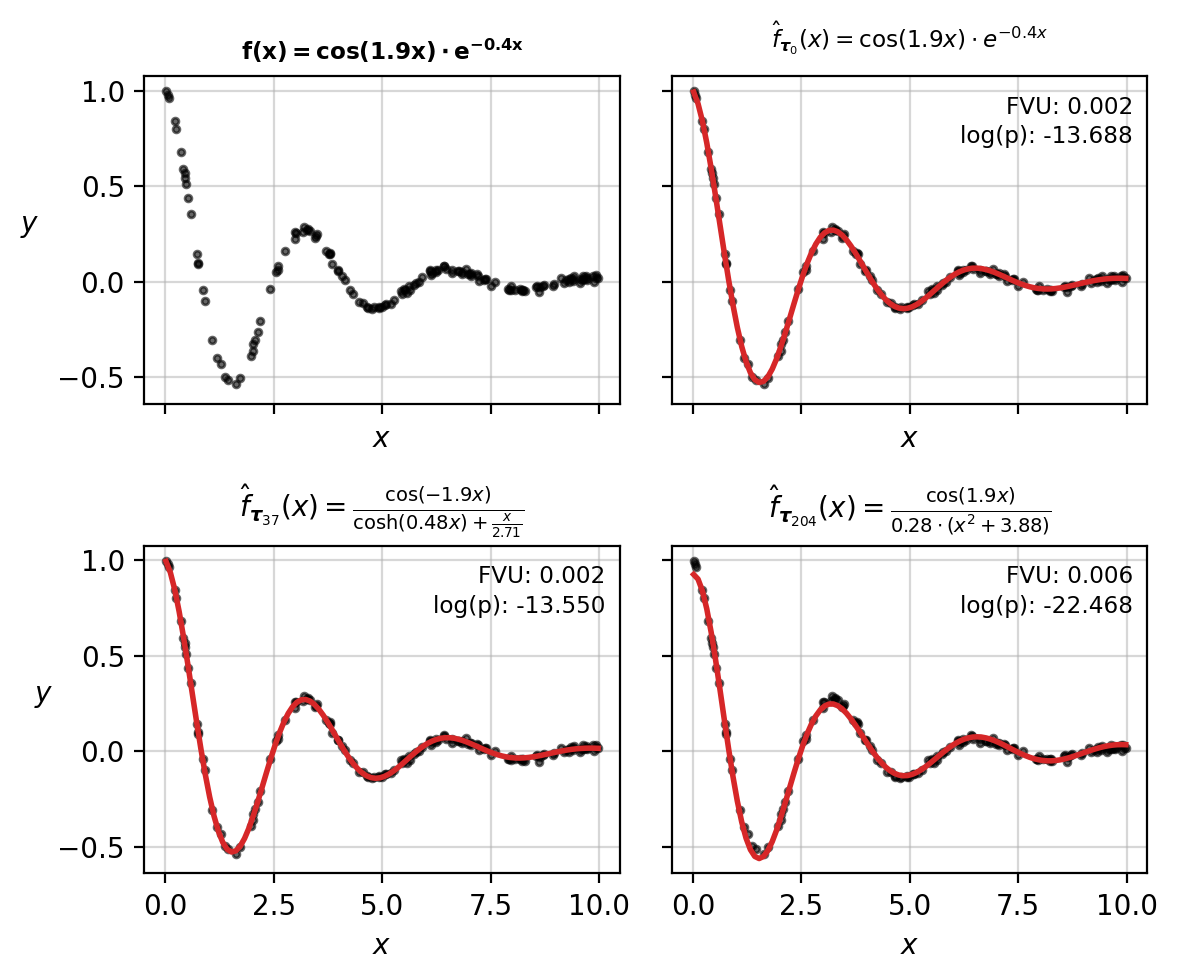

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Updated layout configuration
COLS = 2
ROWS = 2

# 0 cos(-1.9 * x1) * exp(-0.4 * x1)
# 37 cos(-1.9 * x1) / (cosh(0.48 * x1) - x1 / -2.71)
# 204 cos(1.9 * x1) / (0.28 * (pow2(x1) - -3.88))


# Indices of the results to show in the remaining 3 slots
show_expressions_ids = [0, 37, 204]


# latex_expressions = [
#     None,
#     r"\cos(1.9 x) \cdot e^{-0.4 x}",
#     r"\frac{3.84 \cdot \cos(1.9 x)}{\cosh(0.41 \cdot (4.97 + x))}",
#     # r"\cos(-1.9 x) \cdot \left(\frac{10.54}{x+10.48}\right)^{5}",
#     r"\cos(-1.9 x) \cdot {1.3 \cdot 10^5 \cdot (x+10.48)^{-5}}",
# ]

latex_expressions = [
    None,
    r"\cos(1.9 x) \cdot e^{-0.4 x}",
    r"\frac{\cos(-1.9 x)}{\cosh(0.48 x) + \frac{x}{2.71}}",
    r"\frac{\cos(1.9 x)}{0.28 \cdot (x^{2} + 3.88)}",
]

ground_truth_latex_expression = r"\mathbf{f(x) = cos(1.9 x) \cdot e^{-0.4 x}}"

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 3, ROWS * 2.5), dpi=200, sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    # Always plot the ground truth data
    ax.scatter(X, y, color='k', s=6, label='Data' if i == 0 else "", zorder=3, alpha=0.6)
    ax.grid(alpha=0.5, zorder=0)
    ax.set_xlabel('$x$')

    # Top-left plot (i=0): Data only
    if i == 0:
        ax.set_title(f"${ground_truth_latex_expression}$", fontsize='small')
        ax.set_ylabel('$y$', rotation=0, labelpad=10)
        continue

    # Map the subplot index (1, 2, 3) to the expression list index (0, 1, 2)
    list_idx = i - 1

    results_index = show_expressions_ids[list_idx]

    # # Ensure prediction exists
    # if results_index >= len(y_pred) or len(y_pred[results_index]) == 0:
    #     ax.axis('off')
    #     continue

    # Calculate metrics
    fvu = np.mean((y - y_pred[results_index][0])**2) / np.var(y)

    # Transform expression string
    expression_pred_transformed = nsr._results[results_index]['refiner'].transform(
        nsr._results[results_index]['expression'], 0, return_prefix=True
    )
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    # Plot model prediction
    # Color logic adapted to use the specific results_index rank
    # color = plt.get_cmap('RdYlGn')(1 - results_index / len(y_pred))
    ax.plot(X_linspace, y_pred_linspace[results_index][0], color='tab:red', zorder=5, linewidth=2)

    # ax.set_title(f'$\\hat{{f}}_{{\\tau_{results_index}}}(x) = {expression_pred_transformed_infix}$', fontsize='medium' if 'frac' in expression_pred_transformed_infix else 'small', pad=10)
    ax.set_title(f'$\\hat{{f}}_{{\\boldsymbol{{\\tau}}_{{{results_index}}}}}(x) = {latex_expressions[i]}$', fontsize='medium' if 'frac' in latex_expressions[i] else 'small', pad=10)

    print(expression_pred_transformed_infix)

    # Annotations
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.97, 0.94), xycoords='axes fraction', ha='right', va='top', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[results_index]["log_prob"]:.3f}', xy=(0.97, 0.85), xycoords='axes fraction', ha='right', va='top', fontsize='small')

    # Set y-label for the left column
    if i % COLS == 0:
        ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout()

plt.savefig(get_path('results', 'examples', create=True, filename='1d_diverse_example_1.svg'))

# Example 2

In [ ]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    generation_config=SoftmaxSamplingConfig(choices=1024 * 32),
    parsimony=0.05,
    prune_constant_budget=0
).to(device)

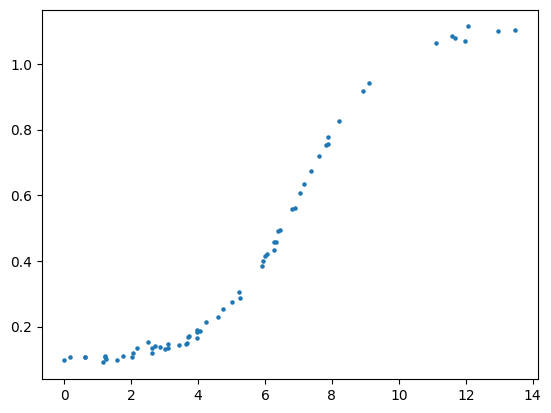

In [162]:
X = np.random.normal(7, 4, size=(64, 1))
X = X - min(X)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y = sigmoid(0.8 * (X - 7)) + 0.1 + np.random.normal(0, 0.01, size=X.shape)

plt.scatter(X, y, s=5)

In [163]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 20904/20904 [00:10<00:00, 1994.03it/s]


In [164]:
nsr.results

,log_prob,fvu,score,expression,complexity,requested_complexity,raw_beam,beam,raw_beam_decoded,function,refiner,prompt_metadata,pruned_variant,beam_id,fit_constants,fit_covariances,fit_loss
0,-29.463923,0.000873,-2.878934,"[*, <constant>, atan, /, cosh, *, <constant>, ...",18,None,"[1, 9, 30, 6, 49, 31, 51, 30, 6, 29, 42, 39, 6...","[30, 6, 49, 31, 51, 30, 6, 29, 42, 39, 66, 39,...","[*, <constant>, atan, /, cosh, *, <constant>, ...",<function <lambda> at 0x7ef072a01080>,"Refiner(expression=['*', '<constant>', 'atan',...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,0,"[0.715795688729602, -0.2462846929265001, 0.113...","[[8.050767182843133e-06, 3.6450113968531173e-0...",0.000098
1,-39.805214,0.000863,-2.854093,"[atan, /, cosh, *, <constant>, x1, -, <constan...",21,None,"[1, 9, 49, 31, 51, 30, 6, 66, 29, 6, 30, 6, 39...","[49, 31, 51, 30, 6, 66, 29, 6, 30, 6, 39, 47, ...","[atan, /, cosh, *, <constant>, x1, -, <constan...",<function <lambda> at 0x7ef06e3cb7e0>,"Refiner(expression=['atan', '/', 'cosh', '*', ...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,1,"[-0.16724572806659274, 9.528219694208685, 7.83...","[[2.9143947129681228e-05, 0.000209438906427277...",0.000097
2,-35.116474,0.000920,-2.846124,"[-, pow2, tanh, /, x1, -, x1, *, <constant>, +...",19,None,"[1, 9, 29, 36, 52, 31, 66, 29, 66, 30, 6, 28, ...","[29, 36, 52, 31, 66, 29, 66, 30, 6, 28, 6, 43,...","[-, pow2, tanh, /, x1, -, x1, *, <constant>, +...",<function <lambda> at 0x7ef077da4720>,"Refiner(expression=['-', 'pow2', 'tanh', '/', ...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,2,"[-53.5876323369764, 2.0883148549973183, -8.044...","[[32.555635267317896, 0.43814690096975445, -5....",0.000103
3,-39.587894,0.000880,-2.815289,"[*, <constant>, atan, *, <constant>, cosh, /, ...",24,None,"[1, 9, 30, 6, 49, 30, 6, 51, 31, 36, 66, 30, 6...","[30, 6, 49, 30, 6, 51, 31, 36, 66, 30, 6, 29, ...","[*, <constant>, atan, *, <constant>, cosh, /, ...",<function <lambda> at 0x7ef06e3c8400>,"Refiner(expression=['*', '<constant>', 'atan',...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,3,"[-0.7124937417939261, -0.1534654930858907, -1....","[[1.2538976499084671e-05, -6.241095573911812e-...",0.000099
4,-18.583815,0.001295,-2.797674,"[*, <constant>, -, atan, pow4, *, <constant>, ...",9,None,"[1, 9, 30, 6, 29, 49, 38, 30, 6, 66, 6, 10, 2,...","[30, 6, 29, 49, 38, 30, 6, 66, 6]","[*, <constant>, -, atan, pow4, *, <constant>, ...",<function <lambda> at 0x7eefb3e362a0>,"Refiner(expression=['*', '<constant>', '-', 'a...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,4,"[0.6791661195676681, 0.13817192787596058, -0.1...","[[1.3867512988211659e-05, -9.851702548693931e-...",0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,-59.583397,NaN,NaN,"[pow1_2, -, pow1_4, -, pow5, *, <constant>, +,...",26,None,"[1, 9, 40, 29, 42, 29, 39, 30, 6, 28, 30, 6, 6...","[40, 29, 42, 29, 39, 30, 6, 28, 30, 6, 66, 30,...","[pow1_2, -, pow1_4, -, pow5, *, <constant>, +,...",<function <lambda> at 0x7eefb8a97f60>,"Refiner(expression=['pow1_2', '-', 'pow1_4', '...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,7888,"[2.532773020876678, 3.519620352517139, 3.85473...","[[inf, inf, inf, inf, inf], [inf, inf, inf, in...",NaN
7889,-59.857544,NaN,NaN,"[cos, /, pow1_4, +, <constant>, *, <constant>,...",28,None,"[1, 9, 45, 31, 42, 28, 6, 30, 6, 66, 31, 49, 2...","[45, 31, 42, 28, 6, 30, 6, 66, 31, 49, 28, 45,...","[cos, /, pow1_4, +, <constant>, *, <constant>,...",<function <lambda> at 0x7ef06f3dc9a0>,"Refiner(expression=['cos', '/', 'pow1_4', '+',...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,7889,"[-7.921216901065659, -5.690059963882224, 6.547...","[[inf, inf, inf, inf, inf, inf], [inf, inf, in...",NaN
7890,-62.191948,NaN,NaN,"[atan, cos, acos, *, <constant>, exp, -, /, -,...",25,None,"[1, 9, 49, 45, 48, 30, 6, 56, 29, 31, 29, 51, ...","[49, 45, 48, 30, 6, 56, 29, 31, 29, 51, 66, 66...","[atan, cos

In [184]:
# # Optional: Re-compile with different parsimony
nsr.compile_results(parsimony=0.1)

In [185]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [186]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results[:2048])]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results[:2048])]

In [191]:
for i in range(10):
    print(i, nsr.get_expression(i))

0 0.68 * (atan(pow4(0.14 * x1)) - -0.17)
1 atan(-0.29 / (pow5(0.18 * x1 + pow1_3(-1.82 - x1)) - 0.16))
2 tanh(pow3(0.08 * x1) * exp(tanh(13315.31 - x1))) - -0.09
3 exp(1.02 - cosh(0.25 * (11.67 - x1))) - -0.1
4 atan(1/(0.53 + (x1 - -4.27) * pow4(0.1 * x1 - 1.28)))
5 0.72 * atan(cosh(-0.25 * (pow1_4(pow5(x1)) - pow5(cos(pow3(0.11 * x1))))) / 6.63)
6 pow2(tanh(x1 / (x1 - -53.59 * (2.09 + pow1_5(x1 * (-8.04 + pow1_2(x1))))))) - -0.11
7 exp(0.01 * cos(pow5(x1)) + atan(-2.56 - -0.48 * x1) - 1.17)
8 atan(-0.39 * (-0.34 * x1 - cos(pow1_3(-334.07 + 0.23 * pow3(-7.81 - x1) - x1))))
9 pow4(tanh(1.53 * x1 - (pow1_4(x1) + x1 * abs(pow1_5(x1))))) - -0.1


In [ ]:
# for i in range(1000):
#     print(i, nsr.get_expression(i))

0.68 * (atan((0.14 * x1)**4) - -0.17)
exp(1.02 - cosh(0.25 * (11.67 - x1))) - -0.1
log(2.08 + sin(-0.26 * (3.99 + x1)))


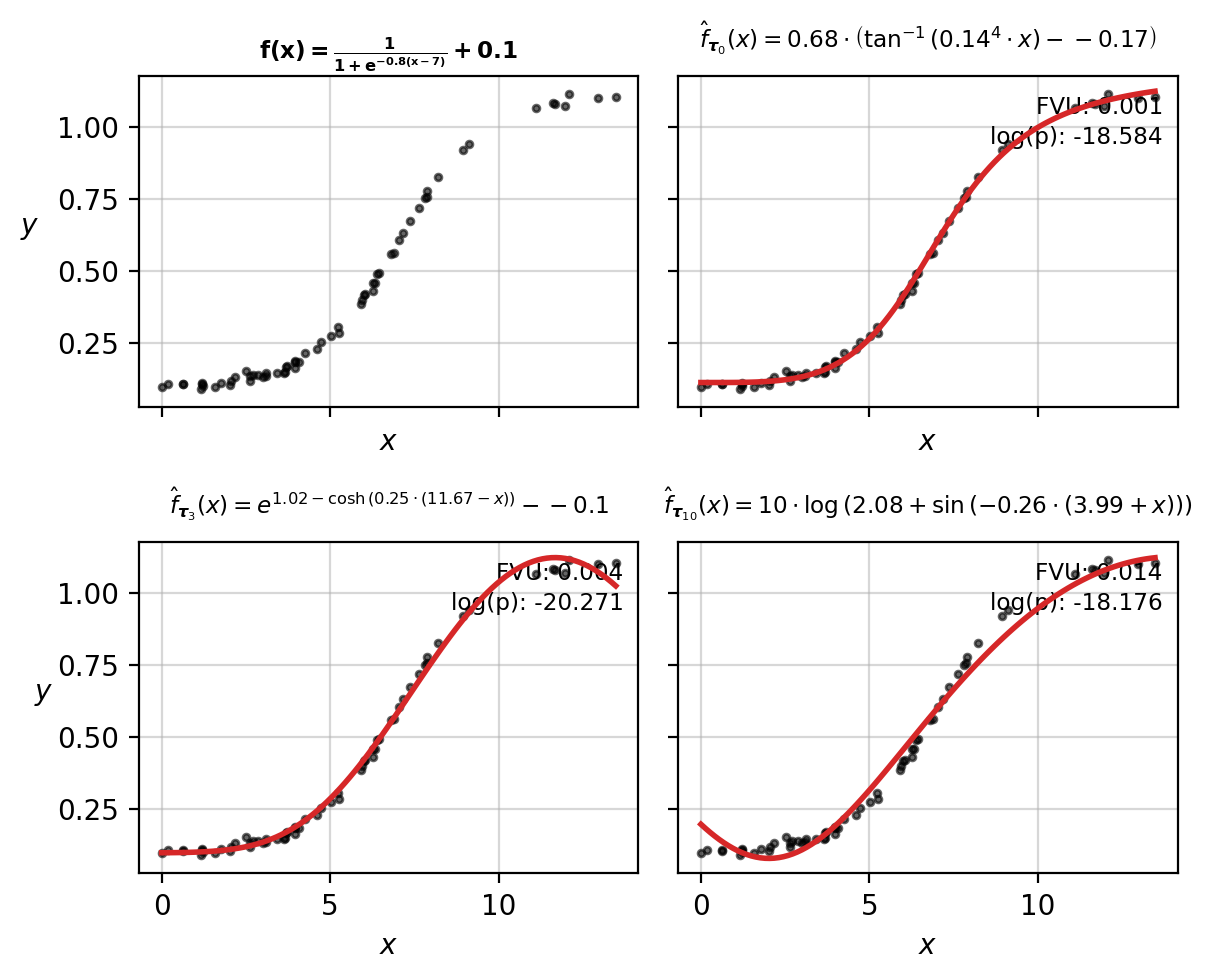

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# Updated layout configuration
COLS = 2
ROWS = 2

# 0 0.68 * (atan(pow4(0.14 * x1)) - -0.17)
# 1 atan(-0.29 / (pow5(0.18 * x1 + pow1_3(-1.82 - x1)) - 0.16))
# 2 tanh(pow3(0.08 * x1) * exp(tanh(13315.31 - x1))) - -0.09


# Indices of the results to show in the remaining 3 slots
show_expressions_ids = [0, 3, 10]


# latex_expressions = [
#     None,
#     r"\cos(1.9 x) \cdot e^{-0.4 x}",
#     r"\frac{3.84 \cdot \cos(1.9 x)}{\cosh(0.41 \cdot (4.97 + x))}",
#     # r"\cos(-1.9 x) \cdot \left(\frac{10.54}{x+10.48}\right)^{5}",
#     r"\cos(-1.9 x) \cdot {1.3 \cdot 10^5 \cdot (x+10.48)^{-5}}",
# ]

latex_expressions = [
    None,
    r"0.68 \cdot \left(\tan^{-1}\left(0.14^{4} \cdot x\right) - -0.17\right)",
    r"e^{1.02 - \cosh\left(0.25 \cdot (11.67 - x)\right)} - -0.1",
    r"10 \cdot \log\left(2.08 + \sin\left(-0.26 \cdot (3.99 + x)\right)\right)",
]

ground_truth_latex_expression = r"\mathbf{f(x) = \frac{1}{1 + e^{-0.8 (x - 7)}} + 0.1}"

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 3, ROWS * 2.5), dpi=200, sharex=True, sharey=True)

for i, ax in enumerate(axs.flat):
    # Always plot the ground truth data
    ax.scatter(X, y, color='k', s=6, label='Data' if i == 0 else "", zorder=3, alpha=0.6)
    ax.grid(alpha=0.5, zorder=0)
    ax.set_xlabel('$x$')

    # Top-left plot (i=0): Data only
    if i == 0:
        ax.set_title(f"${ground_truth_latex_expression}$", fontsize='small')
        ax.set_ylabel('$y$', rotation=0, labelpad=10)
        continue

    # Map the subplot index (1, 2, 3) to the expression list index (0, 1, 2)
    list_idx = i - 1

    results_index = show_expressions_ids[list_idx]

    # # Ensure prediction exists
    # if results_index >= len(y_pred) or len(y_pred[results_index]) == 0:
    #     ax.axis('off')
    #     continue

    # Calculate metrics
    fvu = np.mean((y - y_pred[results_index][0])**2) / np.var(y)

    # Transform expression string
    expression_pred_transformed = nsr._results[results_index]['refiner'].transform(
        nsr._results[results_index]['expression'], 0, return_prefix=True
    )
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    # Plot model prediction
    # Color logic adapted to use the specific results_index rank
    # color = plt.get_cmap('RdYlGn')(1 - results_index / len(y_pred))
    ax.plot(X_linspace, y_pred_linspace[results_index][0], color='tab:red', zorder=5, linewidth=2)

    # ax.set_title(f'$\\hat{{f}}_{{\\tau_{results_index}}}(x) = {expression_pred_transformed_infix}$', fontsize='medium' if 'frac' in expression_pred_transformed_infix else 'small', pad=10)
    ax.set_title(f'$\\hat{{f}}_{{\\boldsymbol{{\\tau}}_{{{results_index}}}}}(x) = {latex_expressions[i]}$', fontsize='medium' if 'frac' in latex_expressions[i] else 'small', pad=10)

    print(expression_pred_transformed_infix)

    # Annotations
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.97, 0.94), xycoords='axes fraction', ha='right', va='top', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[results_index]["log_prob"]:.3f}', xy=(0.97, 0.85), xycoords='axes fraction', ha='right', va='top', fontsize='small')

    # Set y-label for the left column
    if i % COLS == 0:
        ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout()

plt.savefig(get_path('results', 'examples', create=True, filename='1d_diverse_example_1.svg'))